## Data Prep
---

In [444]:
import yfinance as yf
import numpy as np
import seaborn as sns
import pandas as pd

# Set default seaborn figure size
sns.axes_style(rc={'figure.figsize': (10, 5)})

# ==== Marcos
SYMBOL = "TSLA"

# =====
# Fetch [SYMBOL] data with a 1-minute interval
df = yf.download(SYMBOL, interval="1m", period="1d")

df['log_return'] = np.log(df['Close'] / df['Open'])

# Display the fetched data
df.reset_index(inplace=True)
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Datetime,Close,High,Low,Open,Volume,log_return
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,
0,2025-01-07 14:30:00+00:00,405.834991,406.659912,404.799988,405.809998,3701974,0.000062
1,2025-01-07 14:31:00+00:00,407.657501,408.799591,404.500000,405.812012,547717,0.004537
2,2025-01-07 14:32:00+00:00,409.010101,409.129913,406.184814,407.937897,392628,0.002625
3,2025-01-07 14:33:00+00:00,409.105011,409.399902,407.200012,409.119995,352117,-0.000037
4,2025-01-07 14:34:00+00:00,409.597992,409.689911,408.000092,409.105011,361449,0.001204


In [445]:
t = 5
q = 0.001
s = 0.002

# roll_lr is rolling window log return
rolling_log_return = df['log_return'].rolling(t)

df['roll_lr'] = rolling_log_return.sum()
df['volatility'] = rolling_log_return.std()

df['roll_lr_abs'] = df['roll_lr'].map(abs)

thresh = df['roll_lr_abs'].quantile(q)

df['turning_points'] = (df['roll_lr_abs'] < thresh) & (df['volatility'] > s)

df['roll_lr_abs_diff_t'] = df['roll_lr_abs'].diff(t)

# === 
vt = 4

df['EWM_Close'] = df['Close'].ewm(span=vt).mean()
df['EWM_Open'] = df['Open'].ewm(span=vt).mean()
df['EWM_log_return'] = np.log(df['EWM_Close'] / df['EWM_Open'])

df

Price,Datetime,Close,High,Low,Open,Volume,log_return,roll_lr,volatility,roll_lr_abs,turning_points,roll_lr_abs_diff_t,EWM_Close,EWM_Open,EWM_log_return
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,,,,,
0,2025-01-07 14:30:00+00:00,405.834991,406.659912,404.799988,405.809998,3701974,0.000062,NaN,NaN,NaN,False,NaN,405.834991,405.809998,0.000062
1,2025-01-07 14:31:00+00:00,407.657501,408.799591,404.500000,405.812012,547717,0.004537,NaN,NaN,NaN,False,NaN,406.974060,405.811256,0.002861
2,2025-01-07 14:32:00+00:00,409.010101,409.129913,406.184814,407.937897,392628,0.002625,NaN,NaN,NaN,False,NaN,408.012857,406.896277,0.002740
3,2025-01-07 14:33:00+00:00,409.105011,409.399902,407.200012,409.119995,352117,-0.000037,NaN,NaN,NaN,False,NaN,408.514766,407.918206,0.001461
4,2025-01-07 14:34:00+00:00,409.597992,409.689911,408.000092,409.105011,361449,0.001204,0.008392,0.001927,0.008392,False,NaN,408.984590,408.432955,0.001350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2025-01-07 20:55:00+00:00,393.424591,394.350006,391.610901,391.690002,498633,0.004419,0.002314,0.002732,0.002314,False,-0.000858,392.381103,391.692416,0.001757
384,2025-01-07 20:56:00+00:00,393.411591,393.769989,393.250000,393.290009,243892,0.000309,0.005762,0.001906,0.005762,False,0.004627,392.793298,392.331453,0.001176
385,2025-01-07 20:57:00+00:00,393.880005,393.880005,392.959991,393.489990,269001,0.000991,0.006970,0.001760,0.006970,False,0.004166,393.227981,392.794868,0.001102


/var/folders/c8/c3xvsb_56wq1czrwq0kr796c0000gn/T/ipykernel_53189/512989743.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.scatterplot(x=df.index, y=df['Close'][SYMBOL], hue=df['turning_points'], size=df['turning_points'].replace({True: 500, False: 0}), ax=ax1)


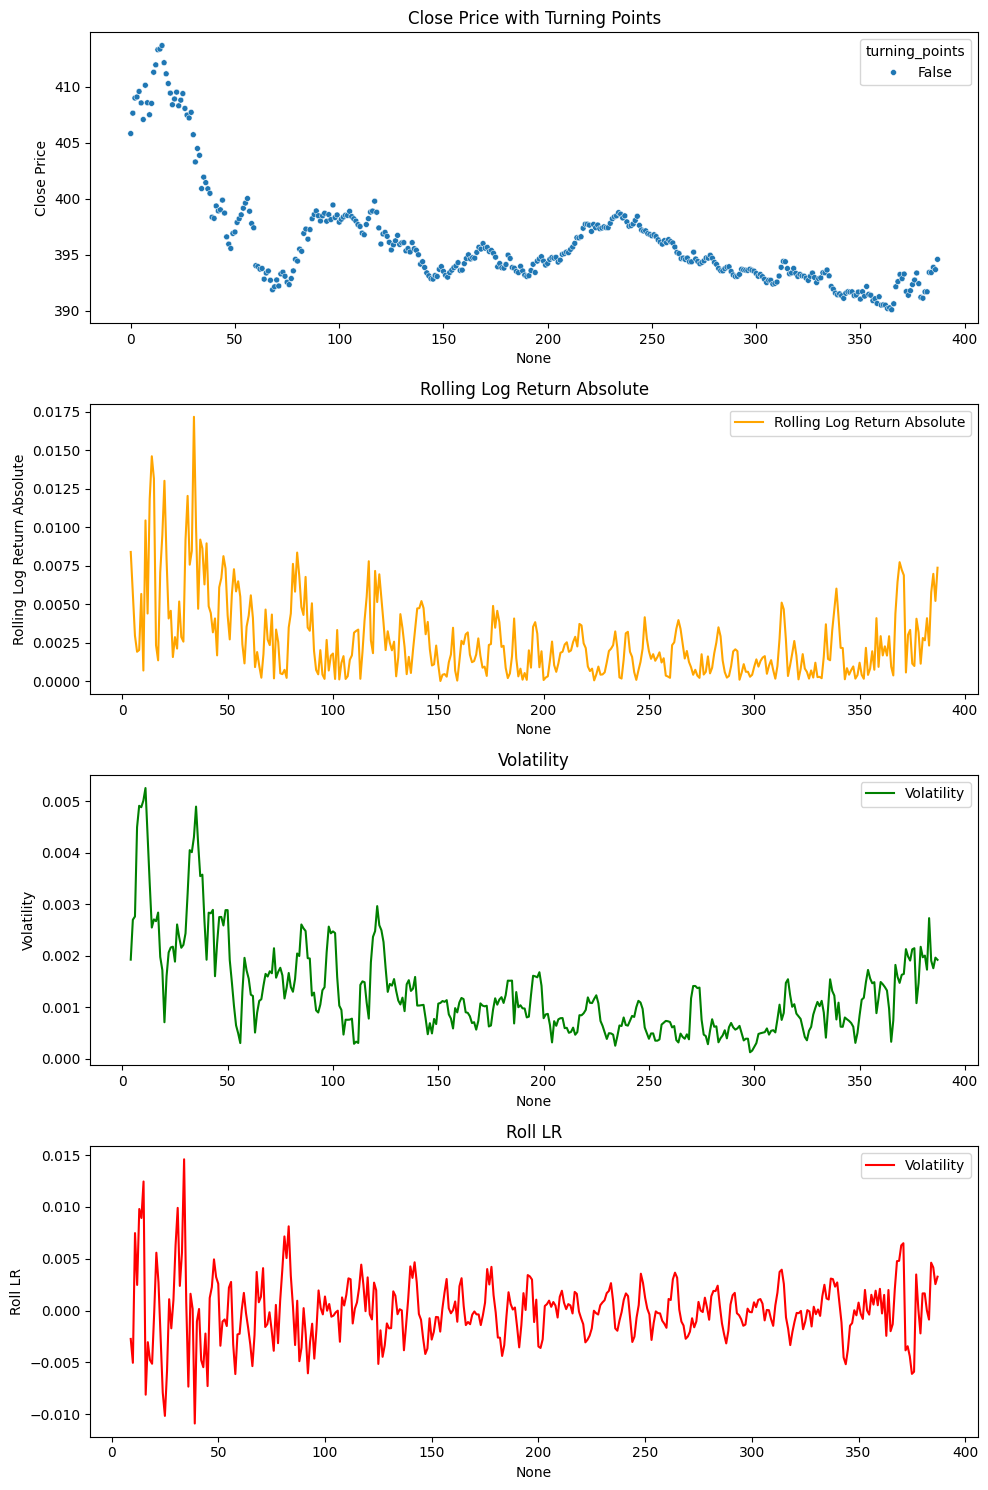

In [446]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 15))

# Scatter plot for Close prices
sns.scatterplot(x=df.index, y=df['Close'][SYMBOL], hue=df['turning_points'], size=df['turning_points'].replace({True: 500, False: 0}), ax=ax1)
ax1.set_ylabel('Close Price')
ax1.set_title('Close Price with Turning Points')

# Line plot for volatility
sns.lineplot(x=df.index, y=df['volatility'], color='green', ax=ax3, label='Volatility')
ax3.set_ylabel('Volatility')
ax3.set_title('Volatility')

# Line plot for roll_lr_abs
sns.lineplot(x=df.index, y=df['roll_lr_abs'], color='orange', ax=ax2, label='Rolling Log Return Absolute')
ax2.set_ylabel('Rolling Log Return Absolute')
ax2.set_title('Rolling Log Return Absolute')

sns.lineplot(x=df.index, y=df['roll_lr_abs_diff_t'], color='red', ax=ax4, label='Volatility')
ax4.set_ylabel('Roll LR')
ax4.set_title('Roll LR')

plt.tight_layout()
plt.show()

# **Volatility**
### 1. smoothning

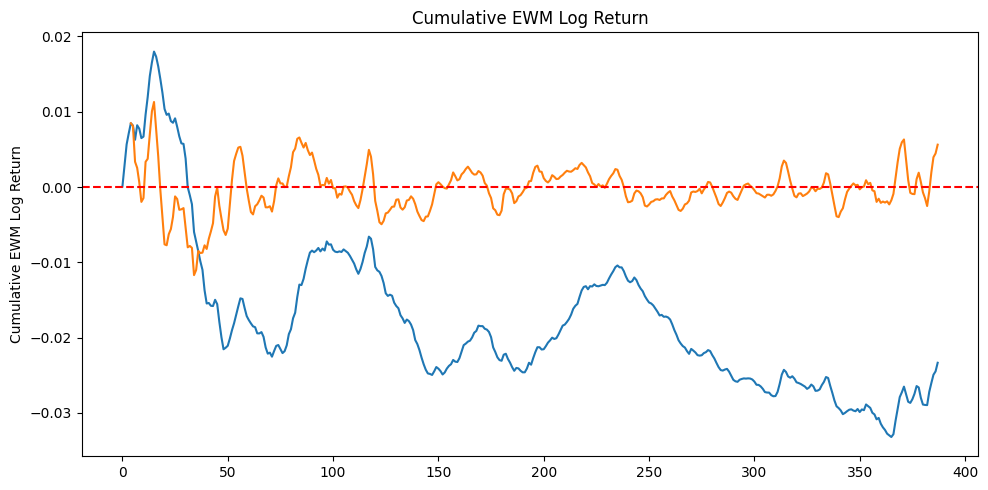

In [447]:
fig, ax = plt.subplots(figsize=(10, 5))

df['EWM_log_return'].cumsum().plot(ax=ax)
ax.set_title('Cumulative EWM Log Return')
ax.set_ylabel('Cumulative EWM Log Return')
ax.set_xticks(ax.get_xticks())  # Align x-axis labels

df['EWM_log_return'].rolling(t).sum().plot(ax=ax)  # Plot on the same axis
ax.axhline(0, color='red', linestyle='--')  # Add horizontal line at y=0

plt.tight_layout()
plt.show()


In [448]:
binned_labels = pd.cut(df['EWM_log_return'].rolling(t).sum(), bins=[-np.inf, -0.0001, 0.0001, np.inf], labels=['l1', 'l2', 'l3'])
df['direction_class'] = binned_labels

<Axes: xlabel='None', ylabel='log_return'>

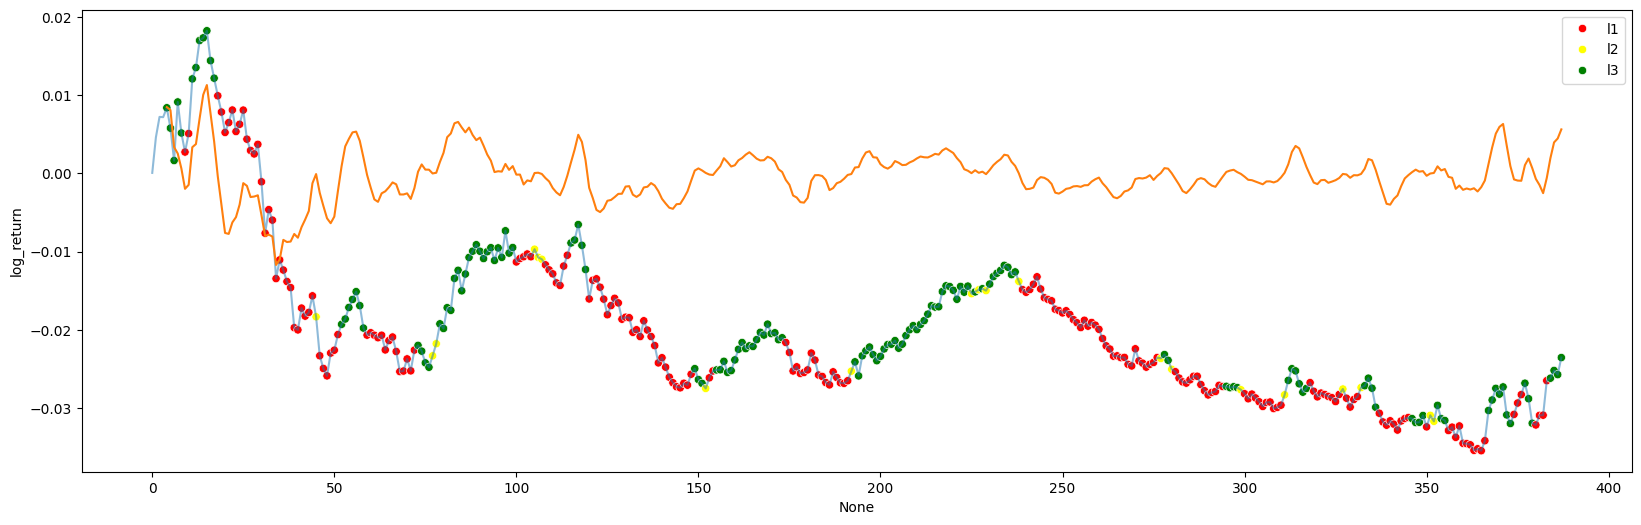

In [449]:
plt.figure(figsize=(20, 6))  # Make the plot wider
sns.lineplot(x=df.index, y=df['log_return'].cumsum(), legend='full', alpha=0.5)
sns.scatterplot(x=df.index, y=df['log_return'].cumsum(), hue=df['direction_class'], palette={'l1': 'red', 'l2': 'yellow', 'l3': 'green'}, legend='full')
sns.lineplot(x=df.index,y= df['EWM_log_return'].rolling(t).sum())  # Plot on the same axis

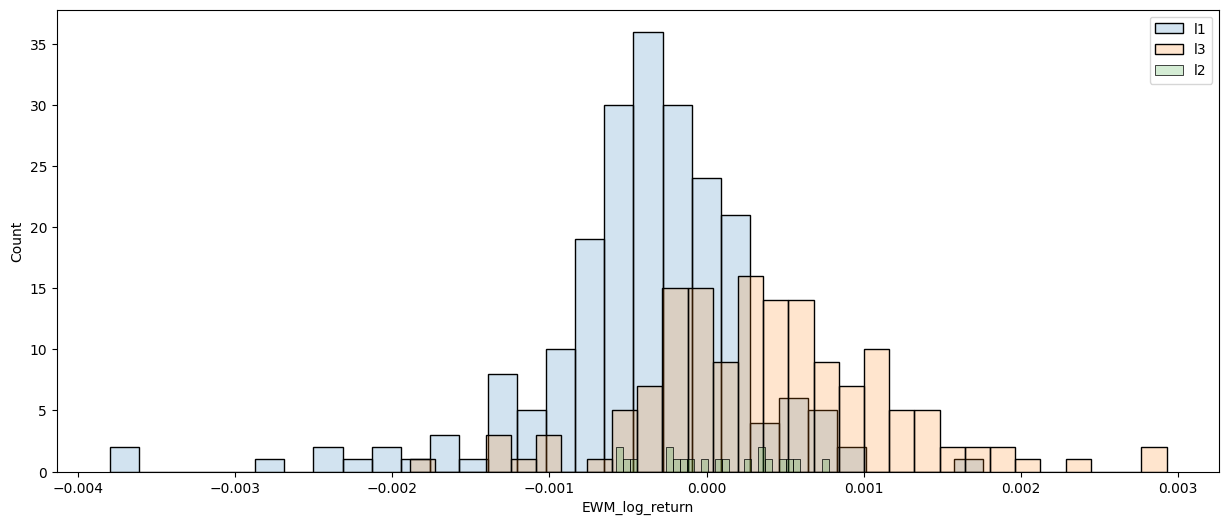

In [450]:
plt.figure(figsize=(15, 6))  # Make the plot wider
sns.histplot(df[df['direction_class']=='l1']['EWM_log_return'], bins=30, label='l1', alpha=0.2)  # Increased number of bins
sns.histplot(df[df['direction_class']=='l3']['EWM_log_return'], bins=30, label='l3', alpha=0.2)  # Increased number of bins
sns.histplot(df[df['direction_class']=='l2']['EWM_log_return'], bins=30, label='l2', alpha=0.2)  # Increased number of bins
plt.legend()